# k-means Clustering Algorithm Example

[]
[0.47991262119464584, 0.9128687288342938, 0.2841874182460081, 0.3128975951430112, 0.3477974344009338, 0.9067526124202959, 0.646107948299046, 0.9674668037082267, 0.38368569634106475, 0.7111598799343176, 0.8682599850028977, 0.008948043198811706, 0.9471064275854271, 0.851764703914738, 0.494839687947617, 0.576453286803061, 0.5376180564038422, 0.9298036261104662, 0.8436570991302794, 0.9838526139779223, 0.5978516654254863, 0.4186201935550491, 0.26554672383491607, 0.07633065138131634, 0.08147189330362226, 0.9216234211920327, 0.33688379588798656, 0.9365573446132089, 0.8681102803191793, 0.6355148272737399, 0.9201850427963136, 0.26335519401978336, 0.9891699265831261, 0.8548789490196762, 0.7872964149243532, 0.12576765898683107, 0.5656507319453655, 0.22359181227411673, 0.6094233158081417, 0.9885983067061781, 0.017861078495917893, 0.2827286405995214, 0.710974654132083, 0.4278281733495438, 0.5141179984650035, 0.8887782281641018, 0.2631564538619251, 0.5431226491817854, 0.49314967091415896, 0.70980

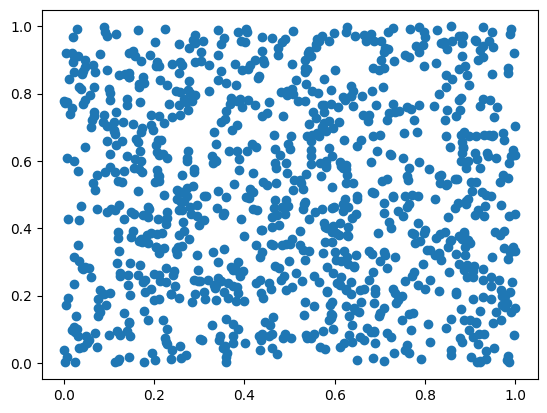

In [30]:
import random
import matplotlib.pyplot as plt

random.random()

n = 1000
p = 2

X=[]

print(X) # Prints []

for i in range(n):
    x_i = [random.random() for i in range(p)]
    X.append(x_i)  # <-- This line must be indented to be INSIDE the loop

# Now X is a list of 100 [x, y] pairs

# Use square brackets [] for indexing, not parentheses ()
x = [point[0] for point in X] # <-- Use [] and changed 'x' to 'point' for clarity
y = [point[1] for point in X] # <-- Use [] and changed 'x' to 'point' for clarity

print(x) # Prints 100 x-coordinates

plt.scatter(x, y)
plt.show() # <-- Add this to display the plot

There are 1000 points.
There are 2 dimensions per point.
Converged in 15 iterations.


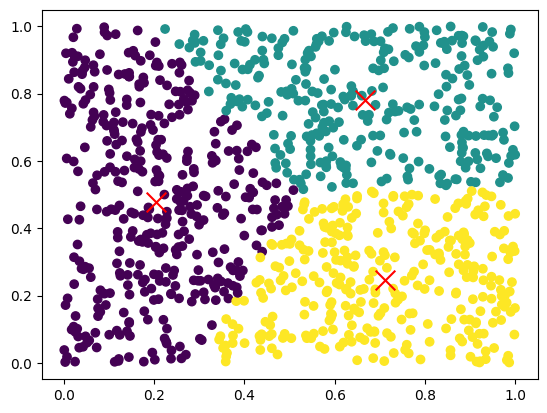

In [31]:
import numpy as np

def add_vector(x, y):
    n = len(x)
    z = [0 for i in range(n)]
    for i in range(n):
        z[i] = x[i] + y[i]

    return z



def kmeans(Y, k):
    n = len(Y)
    p = len(Y[0])

    print(f"There are {n} points.")
    print(f"There are {p} dimensions per point.")

    # Initialization
    assignment = [random.sample(range(k), 1)[0] for i in range(n)] # random assignment of points to clusters

    # print(len(means))
    # print(len(means[0]))

    # iterate


    # print(means)
    # for iteration in range(10):
    converged = False
    iteration = 0
    max_iter = 100
    while not converged and iteration < max_iter:
        iteration = iteration + 1
        converged = True

        means = [[0 for j in range(p)] for i in range(k)]
        n_elements = [0 for i in range(k)]



        for i in range(n):
            # print(i)
            assignment_i = assignment[i]
            # print(len(means))
            # print(assignment_i)
            means[assignment_i] = add_vector(means[assignment_i], Y[i])
            n_elements[assignment_i] = n_elements[assignment_i] + 1

        # Calculate means
        for i in range(k):
            # print(i)
            mean_i = means[i]
            for j in range(p):
                # print(j)
                # print(mean_i)
                # print(n_elements)
                mean_i[j] = mean_i[j] / n_elements[i]

        # print(len(means))
        # print(len(means[0]))

        # Make assignments
        for point in range(n):
            distances = [0 for j in range(k)]

            for cluster in range(k):
                for dim in range(p):
                    diff = Y[point][dim] - means[cluster][dim]
                    distances[cluster] = distances[cluster] + diff * diff

            min_distance_cluster = int(np.argmin(distances))
            is_different = assignment[point] != min_distance_cluster
            if is_different:
                converged = False


            assignment[point] = min_distance_cluster

    if not converged:
        raise Exception("Failure to converge")

    print(f"Converged in {iteration} iterations.")



    return (assignment, means) # assignments, means


def plot_clusters(X, assignments, means): #   Plot the clusters and their means
    x = [X[i][0] for i in range(len(X))] # x-coordinates
    y = [X[i][1] for i in range(len(X))] # y-coordinates
    plt.scatter(x, y, c=assignments) # plot points colored by assignments
    # # add means
    mean_x = [mean[0] for mean in means] # x-coordinates of means
    mean_y = [mean[1] for mean in means] # y-coordinates of means
    plt.scatter(mean_x, mean_y, c='red', marker='x', s=200) # plot means
    plt.show()


assignments, means = kmeans(X, 3)
plot_clusters(X, assignments, means)